# Benchmark regression datasets

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

/export/home/dwaxman/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


## Closed scenario

In [2]:
logws_egs = []
reward_t_eg_s = []
logws_bmas = []
reward_t_bmas = []
static_weights_s = []
reward_t_statics = []

ws_ons = []
reward_t_ons = []

for seed in range(10):
    results = np.load(f'closed/results_setting_closed_seed_{seed}.npz')
    logws_egs.append(results['arr_0'])
    reward_t_eg_s.append(results['arr_1'])
    logws_bmas.append(results['arr_2'])
    reward_t_bmas.append(results['arr_3'])
    static_weights_s.append(results['arr_4']) 
    reward_t_statics.append(results['arr_5'])

    ws_ons.append(results['arr_6']) 
    reward_t_ons.append(results['arr_7'])

log_ws_eg = np.stack(logws_egs)
reward_t_eg = np.stack(reward_t_eg_s)
logws_bma = np.stack(logws_bmas)
reward_t_bma = np.stack(reward_t_bmas)
static_weights = np.stack(static_weights_s)
reward_t_static = np.stack(reward_t_statics)

ws_ons = np.stack(ws_ons)
reward_t_ons = np.stack(reward_t_ons)

In [3]:
colors = ["#FE7F2D", "#780116","#FCCA46",  "#A1C181", "#619B8A"]
SIZE_DEFAULT = 14
SIZE_LARGE = 16
plt.rc("font", weight="normal") 
plt.rc("font", size=SIZE_DEFAULT) 
plt.rc("axes", titlesize=SIZE_LARGE) 
plt.rc("axes", labelsize=SIZE_LARGE) 
plt.rc("xtick", labelsize=SIZE_DEFAULT) 
plt.rc("ytick", labelsize=SIZE_DEFAULT) 

def make_plot(
    x, y, labels, colors, ax, linestyle="solid", offsets=None, ylim=None, ticks_y=True
):
    if offsets is None:
        offsets = [
            0.0,
        ] * len(labels)

    # Plot each of the main lines
    for i, label in enumerate(labels):
        y_mean = np.mean(y[i], axis=0)
        y_std = np.std(y[i], axis=0)

        ax.plot(
            x,
            np.quantile(y[i], 0.5, axis=0),
            label=label,
            color=colors[i],
            linewidth=2,
            linestyle=linestyle,
        )

        ax.fill_between(
            x,
            np.quantile(y[i], 0.1, axis=0),
            np.quantile(y[i], 0.9, axis=0),
            color=colors[i],
            linewidth=2,
            alpha=0.3,
        )

        ax.text(
            x[-1] * 1.01,
            np.median(y[i], axis=0)[-1] + offsets[i],
            label,
            color=colors[i],
            fontweight="bold",
            horizontalalignment="left",
            verticalalignment="center",
        )

    # Hide the all but the bottom spines (axis lines)
    ax.spines["right"].set_visible(False)
    # ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)

    # Only show ticks on the left and bottom spines
    if ticks_y:
        ax.yaxis.set_ticks_position("left")
    ax.xaxis.set_ticks_position("bottom")
    ax.spines["bottom"].set_bounds(min(x), max(x))
    if ylim:
        ax.set_ylim(ylim)


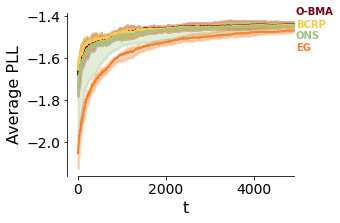

In [4]:
labels = ["EG", 'O-BMA', 'BCRP', 'ONS']
fig, ax = plt.subplots(1, 1, figsize=(4.25, 3))
make_plot(np.arange(4900), [reward_t_eg[:, 100:], reward_t_bma[:, 100:], reward_t_static[:, 100:], reward_t_ons[:,100:]], 
          labels, colors[:4], ax, offsets=[-0.082, 0.059, 0.001, -0.049])  # [-0.082, 0.059, 0.001, -0.049]
plt.xlabel('t')
plt.ylabel('Average PLL')

plt.savefig("closed.pdf", bbox_inches="tight")

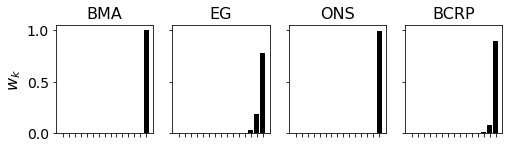

In [5]:
simu = 0
fig, axs = plt.subplots(1, 4, figsize=(8, 2), sharey=True)

axs[1].bar(range(15),np.exp(log_ws_eg)[simu,-1,:], color='black')
axs[1].set_xticks(range(15), [''] * 15)
axs[1].set_title('EG')
axs[0].set_ylabel('$w_k$')

axs[0].bar(range(15),np.exp(logws_bma)[simu,-1,:], color='black')
axs[0].set_xticks(range(15), [''] * 15)
axs[0].set_title('BMA')

axs[2].bar(range(15),ws_ons[simu,-1,:], color='black')
axs[2].set_xticks(range(15), [''] * 15)
axs[2].set_title('ONS')

axs[3].bar(range(15),static_weights[simu,:], color='black')
axs[3].set_xticks(range(15), [''] * 15)
axs[3].set_title('BCRP')

plt.savefig('weights_closed_final.pdf', bbox_inches='tight')

In [6]:
colors_hist = ['#FF0000', '#00FF00', '#0000FF', '#FFFF00', '#FF00FF', '#00FFFF', '#000000', 
 '#FFFFFF', '#FFA500', '#800080', '#008000', '#808080', '#FFC0CB', '#800000', '#000080']


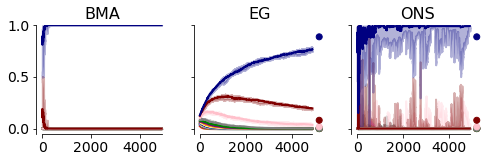

In [7]:
simu = 0
fig, axs = plt.subplots(1, 3, figsize=(8, 2), sharey=True)

make_plot(np.arange(4900), [np.exp(logws_bma)[:, 100:, i] for i in range(15)], 
          [''] * 15, colors_hist, axs[0], offsets=[0]*15, ylim=[-0.05, 1])
axs[0].set_title('BMA')

make_plot(np.arange(4900), [np.exp(log_ws_eg)[:, 100:, i] for i in range(15)], 
          [''] * 15, colors_hist, axs[1], offsets=[0]*15, ylim=None, ticks_y=None)
axs[1].set_title('EG')
axs[1].scatter([5200] * 15, np.median(static_weights, axis=0), color=colors_hist)

make_plot(np.arange(4900), [ws_ons[:, 100:-1, i] for i in range(15)], 
          [''] * 15, colors_hist, axs[2], offsets=[0]*15, ylim=None, ticks_y=None)
axs[2].scatter([5200] * 15, np.median(static_weights, axis=0), color=colors_hist)
axs[2].set_title('ONS')
plt.savefig('weights_closed_evolutions.pdf', bbox_inches='tight')

## Open scenario

In [8]:
logws_egs = []
reward_t_eg_s = []
logws_bmas = []
reward_t_bmas = []
static_weights_s = []
reward_t_statics = []

ws_ons = []
reward_t_ons = []

for seed in range(10):
    results = np.load(f'open/results_setting_open_seed_{seed}.npz')
    logws_egs.append(results['arr_0'])
    reward_t_eg_s.append(results['arr_1'])
    logws_bmas.append(results['arr_2'])
    reward_t_bmas.append(results['arr_3'])
    static_weights_s.append(results['arr_4']) 
    reward_t_statics.append(results['arr_5'])

    ws_ons.append(results['arr_6']) 
    reward_t_ons.append(results['arr_7'])

log_ws_eg = np.stack(logws_egs)
reward_t_eg = np.stack(reward_t_eg_s)
logws_bma = np.stack(logws_bmas)
reward_t_bma = np.stack(reward_t_bmas)
static_weights = np.stack(static_weights_s)
reward_t_static = np.stack(reward_t_statics)

ws_ons = np.stack(ws_ons)
reward_t_ons = np.stack(reward_t_ons)

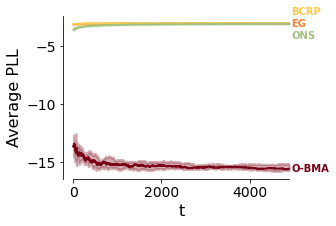

In [9]:
labels = ["EG", 'O-BMA', 'BCRP', 'ONS']
fig, ax = plt.subplots(1, 1, figsize=(4.25, 3))
make_plot(np.arange(4900), [reward_t_eg[:, 100:], reward_t_bma[:, 100:], reward_t_static[:, 100:], reward_t_ons[:, 100:]], 
          labels, colors[:4], ax, offsets=[0, 0.0, 1, -1.0])  
plt.xlabel('t')
plt.ylabel('Average PLL')
plt.savefig("open.pdf", bbox_inches = "tight")

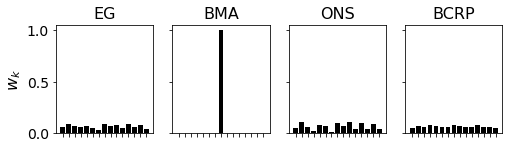

In [10]:
simu = 3
fig, axs = plt.subplots(1, 4, figsize=(8, 2), sharey=True)

axs[0].bar(range(15),np.exp(log_ws_eg)[simu,-1,:], color='black')
axs[0].set_xticks(range(15), [''] * 15)
axs[0].set_title('EG')
axs[0].set_ylabel('$w_k$')

axs[1].bar(range(15),np.exp(logws_bma)[simu,-1,:], color='black')
axs[1].set_xticks(range(15), [''] * 15)
axs[1].set_title('BMA')

axs[2].bar(range(15),ws_ons[simu,-1,:], color='black')
axs[2].set_xticks(range(15), [''] * 15)
axs[2].set_title('ONS')

axs[3].bar(range(15),static_weights[simu,:], color='black')
axs[3].set_xticks(range(15), [''] * 15)
axs[3].set_title('BCRP')

plt.savefig('weights_open_final.pdf')

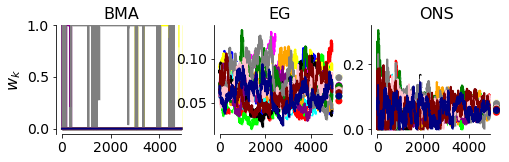

In [11]:
simu = 0
fig, axs = plt.subplots(1, 3, figsize=(8, 2), sharey=False)

make_plot(np.arange(4900), [np.exp(logws_bma)[simu:simu+1, 100:, i] for i in range(15)], 
          [''] * 15, colors_hist, axs[0], offsets=[0]*15, ylim=[-0.05, 1])
axs[0].set_title('BMA')

make_plot(np.arange(4900), [np.exp(log_ws_eg)[simu:simu+1, 100:, i] for i in range(15)], 
          [''] * 15, colors_hist, axs[1], offsets=[0]*15, ylim=None, ticks_y=None)
axs[1].set_title('EG')
axs[1].scatter([5200] * 15, np.median(static_weights, axis=0), color=colors_hist)

make_plot(np.arange(4900), [ws_ons[simu:simu+1, 100:-1, i] for i in range(15)], 
          [''] * 15, colors_hist, axs[2], offsets=[0]*15, ylim=None, ticks_y=None)
axs[2].scatter([5200] * 15, np.median(static_weights, axis=0), color=colors_hist)
axs[2].set_title('ONS')



axs[0].set_ylabel('$w_k$')
plt.savefig('weights_open_evolution.pdf', bbox_inches='tight')